# ML Final Project

## Data Pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import json
import random

data_initial = []
with open('yelp_academic_dataset_review.json') as f:
    for line in f:
        choice = random.randint(1, 100)
        if choice > 50:
            data_initial.append(json.loads(line))
            if len(data_initial) > 5000:
                break

In [5]:
data_initial[0] # one review

{'review_id': 'saUsX_uimxRlCVr67Z4Jig',
 'user_id': '8g_iMtfSiwikVnbP2etR0A',
 'business_id': 'YjUWPpI6HXG530lwP-fb2A',
 'stars': 3.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': 'Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.',
 'date': '2014-02-05 20:30:30'}

In [6]:
def list_to_df(data, list_of_fields):
    df = pd.DataFrame()
    for i in range(len(data)):
        selected_values = [data[i][key] for key in list_of_fields]

        # Create a DataFrame
        temp = pd.DataFrame({key: value for key, value in zip(list_of_fields, selected_values)}, index=[len(df)])
        df = pd.concat([df, temp])
    return df

In [7]:
desired_fields = ['text', 'stars']
df = list_to_df(data_initial, desired_fields)

In [8]:
df.head()

,text,stars
0,Family diner. Had the buffet. Eclectic assortm...,3.0
1,Amazingly amazing wings and homemade bleu chee...,5.0
2,"Locals recommended Milktooth, and it's an amaz...",4.0
3,Good food--loved the gnocchi with marinara\nth...,4.0
4,The bun makes the Sonoran Dog. It's like a snu...,4.0


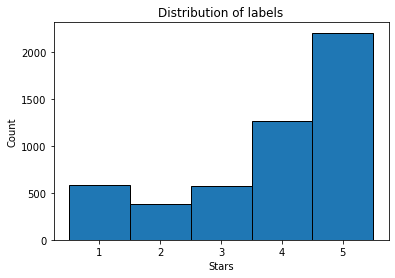

In [9]:
plt.hist(df['stars'], range=(0.5,5.5), bins=5, edgecolor="black")
plt.title("Distribution of labels")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

Instead of randomly reading in different reviews, lets randomly read reviews but limit the number reviews we keep by looking at the stars value.

Our goal is to read in an equal amount of each review to get a more representative sample of data.

In [10]:
# create a dict of data counts according to stars value
data_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [11]:
# update previous code to keep track of data counts
import json
import random

data = []
with open('yelp_academic_dataset_review.json') as f:
    for line in f:
        choice = random.randint(1, 100)
        if choice > 50:
            review = json.loads(line)
            review_stars = int(review['stars'])
            if data_counts[review_stars] < 1000:
                data.append(review)
                data_counts[review_stars] += 1
                if len(data) >= 5000:
                    break

In [12]:
data_counts

{1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000}

In [13]:
df_even = list_to_df(data, desired_fields)

In [14]:
df_even.head()

,text,stars
0,"If you decide to eat here, just be aware it is...",3.0
1,I've taken a lot of spin classes over the year...,5.0
2,"Wow! Yummy, different, delicious. Our favo...",5.0
3,Cute interior and owner (?) gave us tour of up...,4.0
4,Loved this tour! I grabbed a groupon and the p...,5.0


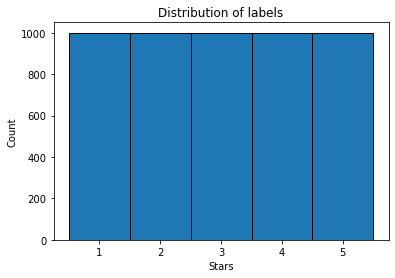

In [15]:
plt.hist(df_even['stars'], range=(0.5,5.5), bins=5, edgecolor="black")
plt.title("Distribution of labels")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.show()

## ML models

### Naive Bayes

Naive Bayes without eliminating stopwords

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_even['text'], df_even['stars'], test_size = 0.2, random_state=42)

In [18]:
# vectorizer to tranform X_train and X_test
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(np.array(X_train))
X_test = vectorizer.transform(np.array(X_test))

In [19]:
# multinomial naive bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [20]:
predictions = mnb.predict(X_test)

In [21]:
accuracy_score(y_test, predictions)

0.475

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.61      0.67      0.64       215
         2.0       0.38      0.39      0.39       201
         3.0       0.32      0.38      0.35       193
         4.0       0.44      0.49      0.46       187
         5.0       0.71      0.43      0.53       204

    accuracy                           0.48      1000
   macro avg       0.49      0.47      0.47      1000
weighted avg       0.50      0.47      0.48      1000



In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_even['text'], df_even['stars'], test_size = 0.2, random_state=42)

In [24]:
# vectorizer to tranform X_train and X_test
vectorizer2 = CountVectorizer(lowercase=True, stop_words='english')
X_train = vectorizer2.fit_transform(np.array(X_train))
X_test = vectorizer2.transform(np.array(X_test))

In [25]:
# multinomial naive bayes
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

MultinomialNB()

In [26]:
predictions2 = mnb2.predict(X_test)

In [27]:
accuracy_score(y_test, predictions2)

0.456

In [28]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         1.0       0.62      0.63      0.63       215
         2.0       0.36      0.37      0.36       201
         3.0       0.31      0.38      0.34       193
         4.0       0.41      0.47      0.44       187
         5.0       0.67      0.42      0.52       204

    accuracy                           0.46      1000
   macro avg       0.48      0.45      0.46      1000
weighted avg       0.48      0.46      0.46      1000



In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 8.0 MB/s eta 0:00:00:00:01


In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, predictions)

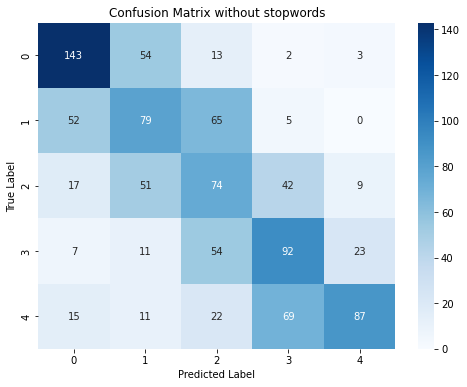

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix without stopwords")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()

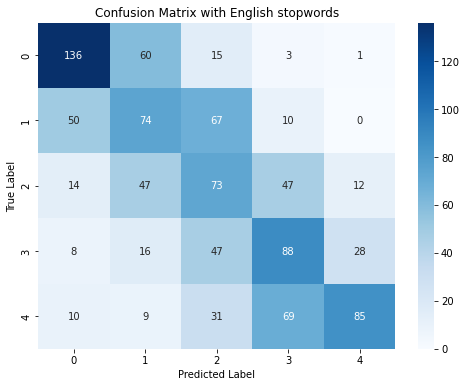

In [35]:
cm2 = confusion_matrix(y_test, predictions2)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with English stopwords")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for the entire model
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

# Print the results
print("Metrics for entire model (no stopwords):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("")

# Calculate precision, recall, and F1-score for the entire model
precision = precision_score(y_test, predictions2, average='micro')
recall = recall_score(y_test, predictions2, average='micro')
f1 = f1_score(y_test, predictions2, average='micro')

# Print the results
print("Metrics for entire model (with stopwords):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Metrics for entire model (no stopwords):
Precision: 0.4750
Recall: 0.4750
F1-score: 0.4750

Metrics for entire model (with stopwords):
Precision: 0.4560
Recall: 0.4560
F1-score: 0.4560
